In [61]:
#import primary modules :
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from IPython.display import HTML
import folium
from wordcloud import WordCloud, STOPWORDS


PreProcessing

In [2]:
#Import Dataset
df = pd.read_csv('london_crime_by_lsoa.csv')

In [3]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
df.shape

(13490604, 7)

In [5]:
print(df.columns)

Index(['lsoa_code', 'borough', 'major_category', 'minor_category', 'value',
       'year', 'month'],
      dtype='object')


In [6]:
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [7]:
df.borough

0              Croydon
1            Greenwich
2              Bromley
3            Redbridge
4           Wandsworth
               ...    
13490599         Brent
13490600    Hillingdon
13490601        Sutton
13490602       Croydon
13490603        Merton
Name: borough, Length: 13490604, dtype: object

In [8]:
df.year

0           2016
1           2016
2           2015
3           2016
4           2008
            ... 
13490599    2015
13490600    2015
13490601    2011
13490602    2011
13490603    2015
Name: year, Length: 13490604, dtype: int64

In [9]:
df[['borough', 'major_category', 'minor_category']]

,borough,major_category,minor_category
0,Croydon,Burglary,Burglary in Other Buildings
1,Greenwich,Violence Against the Person,Other violence
2,Bromley,Violence Against the Person,Other violence
3,Redbridge,Burglary,Burglary in Other Buildings
4,Wandsworth,Robbery,Personal Property
...,...,...,...
13490599,Brent,Criminal Damage,Criminal Damage To Dwelling
13490600,Hillingdon,Robbery,Personal Property
13490601,Sutton,Burglary,Burglary in a Dwelling
13490602,Croydon,Robbery,Business Property


Data Visualizations

Area Plot

In [47]:
df_area = df.groupby(['major_category', 'year'])['value'].sum() 
df_area = pd.DataFrame(df_area) 
df_area.reset_index(inplace=True) 
df_area = df_area.pivot(index='major_category', columns ='year', values='value') 
df_area['total'] = df_area.sum(axis=1) 
df_area.sort_values(by=['total'], ascending=False, axis=0, inplace=True) 
df_area = df_area.head().T.drop('total') 
df_area

major_category,Theft and Handling,Violence Against the Person,Burglary,Criminal Damage,Drugs
year,,,,,
2008,283692,159844,88092,91872,68804
2009,279492,160777,90619,85565,60549
2010,290924,157894,86826,77897,58674
2011,309292,146901,93315,70914,57550
2012,334054,150014,93392,62158,51776
2013,306372,146181,87222,56206,50278
2014,279880,185349,76053,59279,44435
2015,284022,218740,70489,62976,39785
2016,294133,232381,68285,64071,38914


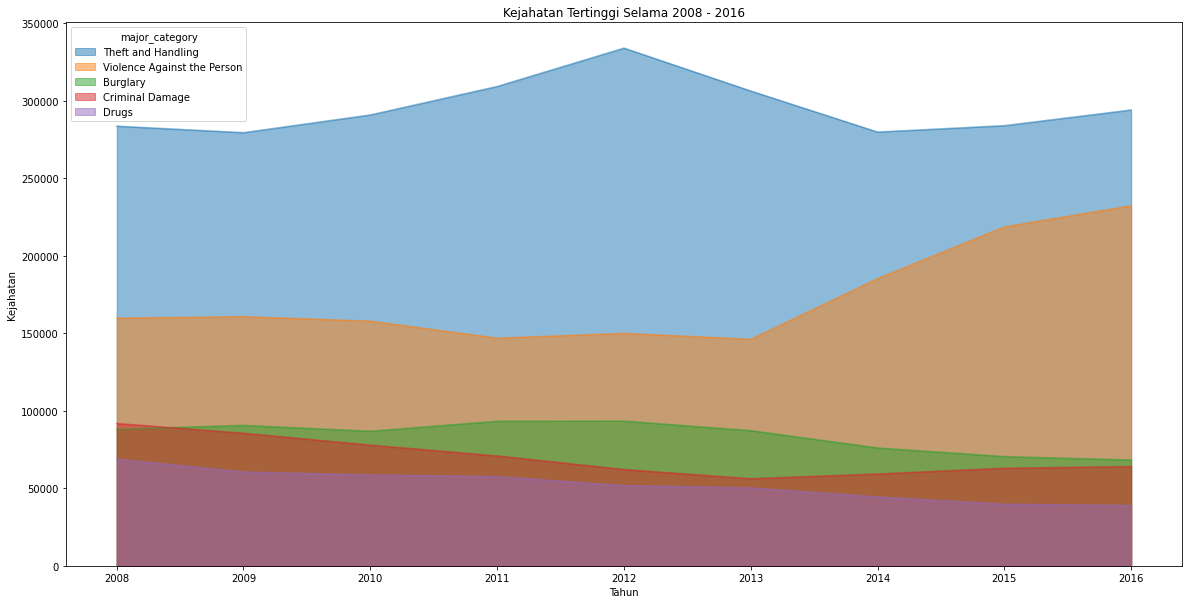

In [48]:
df_area.plot(kind='area',
            stacked=False,
            figsize=(20,10))
plt.title('Kejahatan Tertinggi Selama 2008 - 2016')
plt.ylabel('Kejahatan')
plt.xlabel('Tahun')
plt.show()

Pada Area Plot, pada tahun 2012 kategori kejahatan 'Theft and Handling' merupakan kejahatan yang paling banyak terjadi di Wilayah Kota London

Histogram

In [32]:
df_hist = df.groupby(['borough', 'year'])['value'].sum()
df_hist = pd.DataFrame(df_hist)
df_hist.reset_index(inplace = True)

In [33]:
df_hist = df_hist.pivot(index='borough', columns ='year', values='value')
df_hist['total'] = df_hist.sum(axis=1) 
df_hist.sort_values(by=['total'], ascending=False, axis=0, inplace=True) 
df_hist = df_hist.head().T.drop('total') 
df_hist

borough,Westminster,Lambeth,Southwark,Camden,Newham
year,,,,,
2008,47846,31717,33470,32010,29752
2009,48456,31225,30623,31612,28610
2010,48116,31671,31320,31804,30728
2011,54243,33224,30723,33956,27978
2012,59226,33473,30737,31472,30067
2013,53852,31868,31128,28435,27577
2014,47564,31765,28912,27198,28005
2015,47395,33164,30260,29477,29217
2016,48330,34071,31636,29183,30090


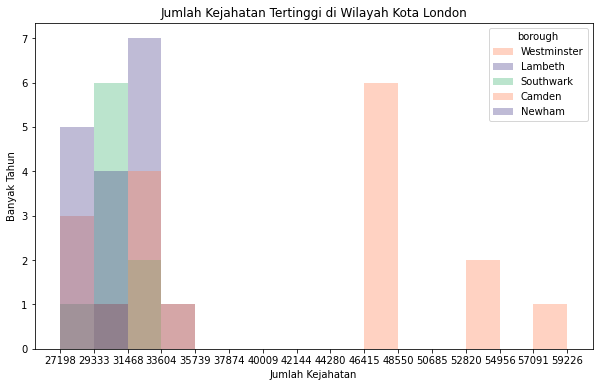

In [35]:
count, bin_edges = np.histogram(df_hist, 15)
df_hist.plot(kind = 'hist',
            figsize = (10, 6),
            bins = 15,
            alpha = 0.35,
            xticks = bin_edges,
            color = ['coral', 'darkslateblue', 'mediumseagreen'])
plt.title('Jumlah Kejahatan Tertinggi di Wilayah Kota London')
plt.xlabel('Jumlah Kejahatan')
plt.ylabel('Banyak Tahun')
plt.show()

Jumlah Kejahatan Tertinggin di Wilayah Kota Londong yang divisualisasikan menggunakan Histogram, terlihat bahwa Westminster dan Camden merupakan wilayah dengan kejahatan tertinggi.

Bar Chart

Jenis Kejahatan :  ['Burglary' 'Violence Against the Person' 'Robbery' 'Theft and Handling'
 'Criminal Damage' 'Drugs' 'Fraud or Forgery' 'Other Notifiable Offences'
 'Sexual Offences']
Total Jenis Kejahatan yang Terjadi :  [ 754293  630938  470765    5325  106349  258873    1273 2661861 1558081]


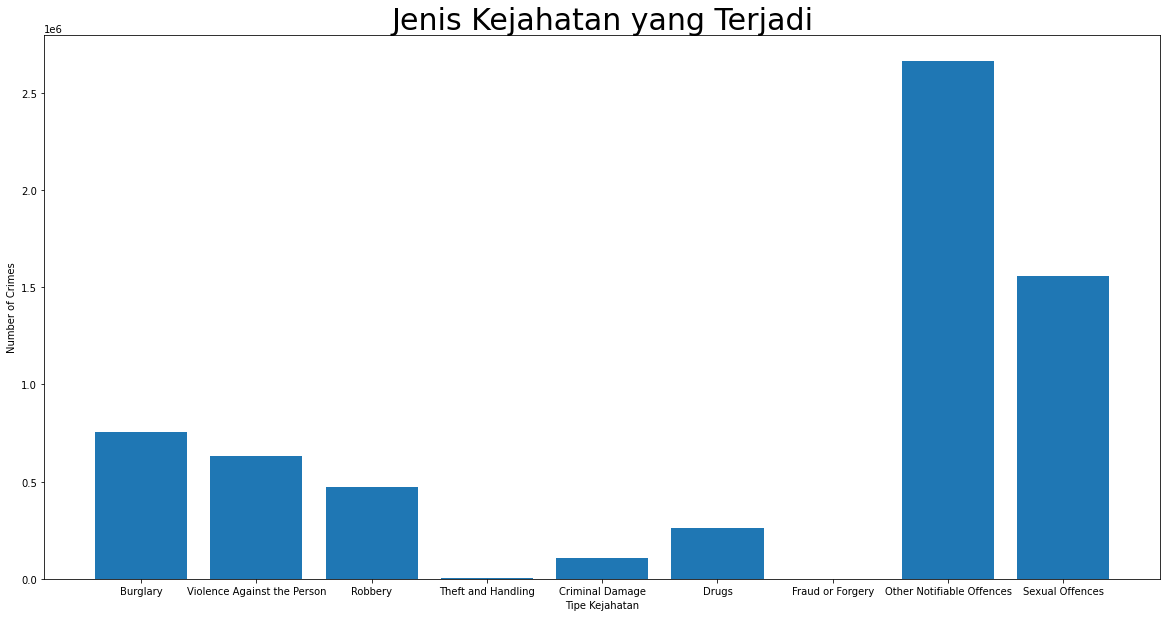

In [22]:
label = df['major_category'].unique()
print("Jenis Kejahatan : ", label)
pos = np.arange(len(label))
totals = df.groupby('major_category').sum()
Totals = totals['value'].to_numpy()
print("Total Jenis Kejahatan yang Terjadi : ", Totals)
plt.figure(figsize=(20,10))
plt.bar(pos, Totals)
plt.xticks(pos, label)
plt.xlabel('Tipe Kejahatan')
plt.ylabel('Number of Crimes')
plt.title('Jenis Kejahatan yang Terjadi', fontsize=30)
plt.show()

Pada Bar Chart ini terlihat bahwa Kategori Other Notifiable Offences adalah Kejahatan yang paling tinggi di wilayah kota Londong, yang diikuti oleh Kategori Sexual Offences.

Pie Chart

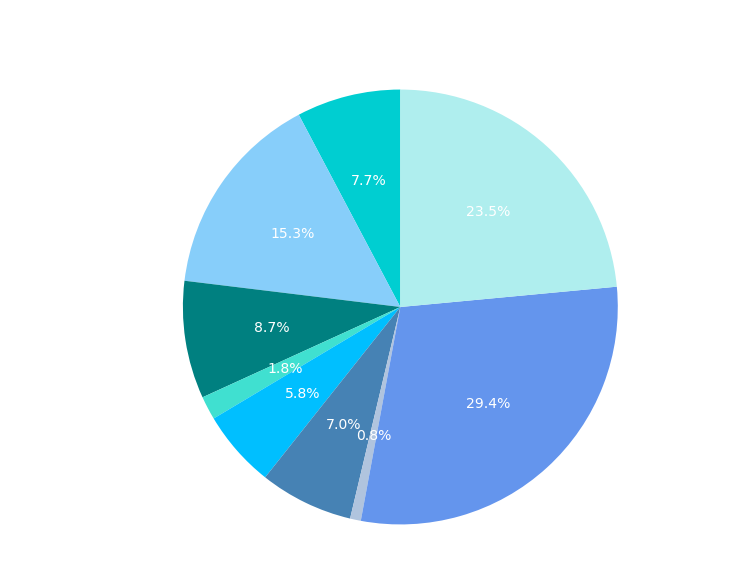

In [16]:
labels = df['major_category'].unique()

sizes = df.groupby(['major_category']).size()
plt.figure(figsize = (20,10))
ax = plt.axes()
plt.title('Persentase Kejahatan di Setiap Kategori', fontsize = 30, color = 'white')
colors=['darkturquoise','lightskyblue','teal','turquoise', 'deepskyblue','steelblue','lightsteelblue','cornflowerblue','paleturquoise']
ab=plt.pie(sizes, labels=labels, colors=colors, startangle=90,autopct='%1.1f%%', textprops={'fontsize': 14,'color':'white'})
plt.show()

Pada bar chart terlihat persentase dari Other Notifiable Offences dengan 29,4% merupakan kejahatan yang paling tinggi, dan dibawahnya dengan persentase 23,5% yaitu Sexual Offences.

Scatter Plot

no of crime in each month in the year 2016
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
[58847 56697 59167 58637 63990 62262 65519 62666 61412 63405 61064 62455]


(array([56000., 58000., 60000., 62000., 64000., 66000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

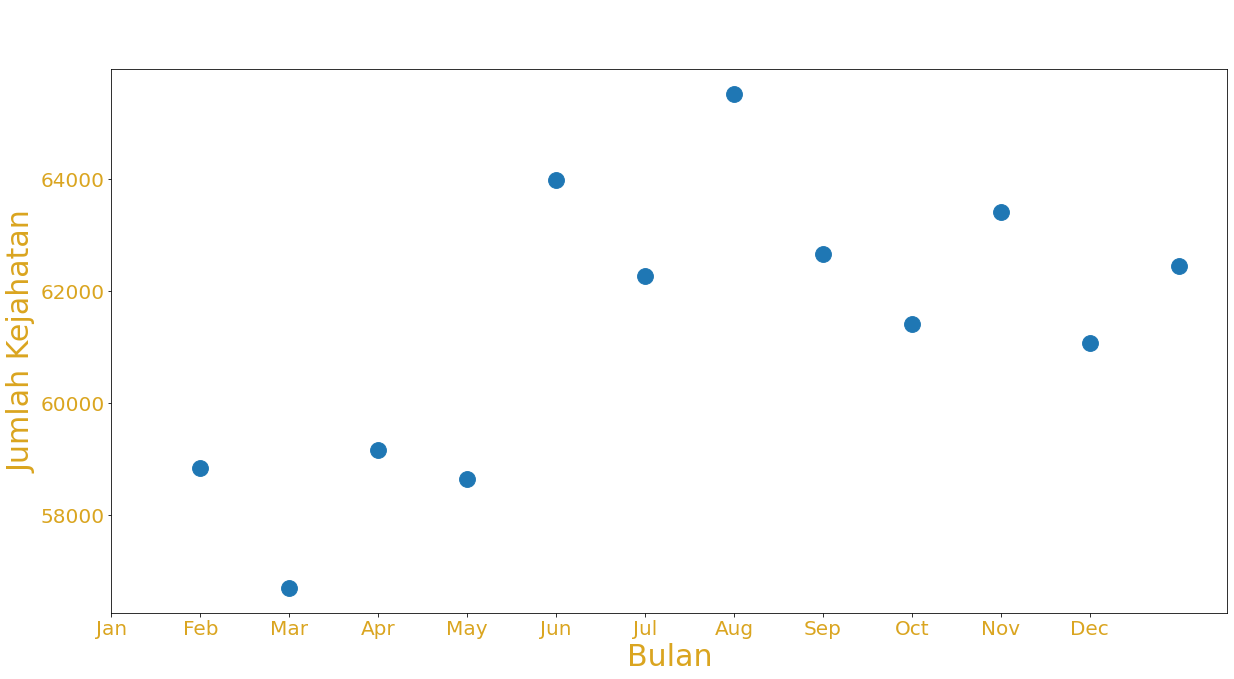

In [23]:
year2016=df.loc[df['year'] == 2016]

months=year2016['month'].unique()

months.sort()
sum_month=year2016.groupby(['month']).sum()

Values=sum_month['value'].to_numpy()
name_of_months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
print("no of crime in each month in the year 2016")
print(name_of_months)
print(Values)
n1 = np.arange(len(months))
xrange=range(1,13)
plt.figure(figsize=(20,10))
ax = plt.axes()
plt.scatter(xrange,Values,s=250,cmap='viridis',alpha=1)
plt.title("Jumlah Kejahatan di Tahun 2016\n", color = 'white', fontsize=30)
plt.xlabel('Bulan',fontsize=30,color='goldenrod')
plt.ylabel('Jumlah Kejahatan',fontsize=30,color='goldenrod')
plt.xticks(n1,name_of_months)
plt.xticks(color='goldenrod',fontsize=20)
plt.yticks(color='goldenrod',fontsize=20)

Dari Scatter Plot terlihat bahwa kejahatan yang terjadi pada bulan Agustus tahun 2016 pada wilayah kota London merupakan jumlah kejahatan yang paling tinggi.

Box plot

In [57]:
df_box = df.groupby(['borough', 'year'])['value'].sum()
df_box = pd.DataFrame(df_box)
df_box.reset_index(inplace=True)
df_box = df_box.pivot(index='borough', columns ='year', values='value')
df_box['Total'] = df_box.sum(axis=1)
df_box.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
borough,,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741,149447
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684,212191
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840,114136
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693,227551
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164,184349


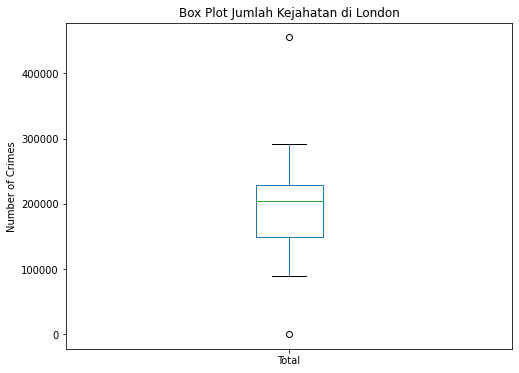

In [59]:
df_box['Total'].plot(kind='box', figsize=(8,6))
plt.title('Box Plot Jumlah Kejahatan di London')
plt.ylabel('Number of Crimes')
plt.show()

dari Box Plot kita dapat meng-observasi bahwa Jumlah kejahatan yang terjadi di wilayah London sekitar 100000 (min) dan paling tinggi adalah sekitar 300000 (max).

Word Clouds

In [63]:
df_word = df.groupby('major_category')['value'].sum()
df_word = pd.DataFrame(df_word)
df_word.head()

,value
major_category,
Burglary,754293
Criminal Damage,630938
Drugs,470765
Fraud or Forgery,5325
Other Notifiable Offences,106349


In [71]:
total = df_word['value'].sum()
max_words = 100
word_string = ''
for major_category in df_word.index.values:
    if len(major_category.split(' ')) == 1:
        repeat_num_times = int(df_word.loc[major_category,'value'] / float(total)*max_words)
        word_string = word_string + ((major_category + ' ') * repeat_num_times)
word_string

'Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Drugs Drugs Drugs Drugs Drugs Drugs Drugs Robbery Robbery Robbery Robbery '

In [72]:
wordcloud = WordCloud(background_color='white').generate(word_string)
print('Word Cloud Siap')

Word Cloud Siap


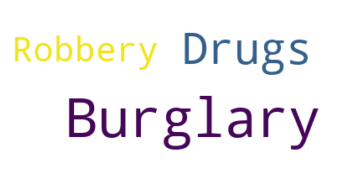

In [73]:
fig = plt.figure()

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Burglary merupakan kejahatan yang paling sering terjadi di wilayah Kota London

Folium Maps

In [18]:
df2=df[['borough','value']]
world_geo = r'https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson' 
world_map = folium.Map(location=[54.237933,-2.36967], zoom_start=5)
world_map
world_map.choropleth(
    geo_data=world_geo,
    name='choropleth',
    data=df2,
    columns=['borough', 'value'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime rate in boroughs of london'
    
)
world_map.save('LondonCrime.html')
display(world_map)

/usr/local/lib/python3.9/site-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


Kesimpulan

Kesimpulan yang bisa diambil data data visualisasi diatas bahwa :
1. Westminster dan Camden merupakan Wilayah dengan kejahatan tertinggi.
2. Kejahatan yang paling spring dilakukan yaitu “Other Notifiable Offences” dengan persentasi 29,4% dan “Sexual Offences” 23,5%.
3. Jumlah Kejahatan yang terjadi di Wilayah London paling tinggi 300000 kejahatan.
